<a href="https://colab.research.google.com/github/kocurvik/edu/blob/master/PNNPPV/notebooky/cv03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. cvičenie - trénovanie sietí

V tomto notebooku si vyskúšame trénovanie v kerase. Prejdeme si základ delenia dát na trénovacie, validačné a testovacie. Skontrolujeme účinky over a underfittingu. Otestujeme rôzne aktivačné funkcie a cenové funkcie. Otestujeme možnosti regularizácie.

Behom cvičenia budeme používať framework keras. Jeho dokumentáciu nájdete na [keras.io](https://keras.io/)

## Plne prepojená sieť v kerase

V tomto aj v ďalších cvičeniach budeme používať keras. Keras pôvodne vznikol ako nadstavba tensorflow a theana aby poskytol jednoduché API pre deep learning. Dnes je keras dokonca súčasťou distribúcie tensorflowu. My si ho však budeme importovať samostatne.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist

Načítame dáta. 

11493376/11490434 [==============================] - 1s 0us/step


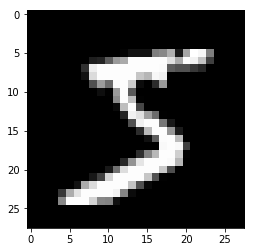

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [4]:
(x, y), (x_test, y_test) = mnist.load_data()
x = np.reshape(x,(-1,784)).astype(np.float32) / 255
x_test = np.reshape(x_test,(-1,784)).astype(np.float32) / 255
y = keras.utils.to_categorical(y)
y_test = keras.utils.to_categorical(y_test)

plt.imshow(np.reshape(x[0,:],(28,28)), cmap='gray')
plt.show()
print(y[0])

### Konštrukcia modelu

Keras má triedu Sequential, ktorá predstavuje model neurónovej siete, kde každá vrstva posúva svoje výstupy do práve jednej nasledujúcej. To modelu tak vieme jednoznačne pridávať ďalšie vrstvy. Teraz si spravíme model ako z minulého cvičenia.

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [6]:
model = Sequential()
model.add(Dense(30, activation='sigmoid', input_shape=(784,)))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

Modelu musíme pridať cenovú funkciu a vybrať optimalizačný algoritmus. Tento krok za nazýva tzv. kompilácia. Po kompilácii si môžeme model pozrieť pomocou metódy summary.

*Pozn.:* Summary môžeme zavolať až keď je model kompletný. Teda vieme aké v ňom budú veľkosti vrstiev. Ak prvej vrstve nepridáme parameter input_shape, tak summary môžeme zavolať až po trénovaní (to už sieť bude vedieť aký je vstup).

In [7]:
loss = keras.losses.categorical_crossentropy
model.compile(loss=loss,
              optimizer='sgd',
              metrics=['accuracy'])
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                23550     
_________________________________________________________________
dense_2 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________
None


Model trénujeme volaním metódy fit ktorej poskytneme trénovacie dáta. Tentokrát si tréning spustíme len na chvílu. Neriešime ani validačné dáta.

In [8]:
model.fit(x, y, batch_size=32, epochs=5)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
60000/60000 [==============================] - 13s 208us/step - loss: 2.2649 - acc: 0.2412
Epoch 2/5
60000/60000 [==============================] - 7s 120us/step - loss: 2.0641 - acc: 0.4835
Epoch 3/5
60000/60000 [==============================] - 7s 117us/step - loss: 1.6911 - acc: 0.5885
Epoch 4/5
60000/60000 [==============================] - 7s 116us/step - loss: 1.3123 - acc: 0.6935
Epoch 5/5
60000/60000 [==============================] - 7s 117us/step - loss: 1.0098 - acc: 0.7700


## Predbežné testovanie modelu

Pri trénovaní modelu je nutné overiť si, že má dostatočnú kapacitu pre daný problém. Kapacita modelu je v tomto prípade vyjadrenie toho akú veľkú (resp. ako zložitú) množinu funkcií je možné modelovať. Ak náš model ani teoreticky nedokáže modelovať žiadanú funkciu (napr. klasifikátor), tak nieje vhodné ho použiť. Napr. používať lineárny klasifikátor na dáta o ktorých vieme, že sú lineárne neseparovateľné je príklad nedostatočnej kapacity modelu.

Najjednoduchšie ako toto budeme testovať je tak, že vyberieme veľmi malú časť (napr. 1 minibatch) dát na ktorých chceme trénovať a overíme, či sa nám podarí model natrénovať na 100 percent na takejto malej vzorke.

Týmto testovaním tiež overíme, že trénovanie funguje a nieje problém s dátami. Tento postup je vhodný prvý krok pri troubleshootingu sietí.

*Pozn.:* Pri takomto testovaní je dôležité nemať všetky príklady z rovnakej kategórie, lebo v takom prípade ani netreba uvažovať o kapacite modelu.

Vyberieme malú vzorku dát a skúsime natrénovať model.

In [9]:
x_mini = x[:32]
y_mini = y[:32]

model = Sequential()
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

loss = keras.losses.categorical_crossentropy
model.compile(loss=loss,
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(x_mini, y_mini, steps_per_epoch=1000, epochs=10)

Epoch 1/10
1000/1000 [==============================] - 4s 4ms/step - loss: 2.1673 - acc: 0.2220
Epoch 2/10
1000/1000 [==============================] - 4s 4ms/step - loss: 1.9409 - acc: 0.3965
Epoch 3/10
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5564 - acc: 0.6616
Epoch 4/10
1000/1000 [==============================] - 4s 4ms/step - loss: 1.1277 - acc: 0.7500
Epoch 5/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.8092 - acc: 0.7754
Epoch 6/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.5994 - acc: 0.9025
Epoch 7/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.4555 - acc: 0.9367
Epoch 8/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.3499 - acc: 1.0000
Epoch 9/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.2705 - acc: 1.0000
Epoch 10/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.2112 - acc: 1.0000


Ako je možné vidieť tak náš model dosahuje 100 percentnú presnosť na našich dátach. To ukazuje, že náš model má aspoň takú kapacitu aby fungoval. Teraz si ukážeme príklad keď to nefunguje. Napríklad vynechaním nelinearity.

In [10]:
x_mini = x[:32]
y_mini = y[:32]

model = Sequential()
model.add(Dense(30))
model.add(Dense(20))
model.add(Dense(10))

loss = keras.losses.categorical_crossentropy
model.compile(loss=loss,
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(x_mini, y_mini, steps_per_epoch=1000, epochs=10)

Epoch 1/10
1000/1000 [==============================] - 4s 4ms/step - loss: 8.0450 - acc: 0.1261
Epoch 2/10
1000/1000 [==============================] - 4s 4ms/step - loss: 8.0590 - acc: 0.1250
Epoch 3/10
1000/1000 [==============================] - 4s 4ms/step - loss: 8.0590 - acc: 0.1250
Epoch 4/10
1000/1000 [==============================] - 4s 4ms/step - loss: 8.0590 - acc: 0.1250
Epoch 5/10
1000/1000 [==============================] - 4s 4ms/step - loss: 8.0590 - acc: 0.1250
Epoch 6/10
1000/1000 [==============================] - 4s 4ms/step - loss: 8.0590 - acc: 0.1250
Epoch 7/10
1000/1000 [==============================] - 4s 4ms/step - loss: 8.0590 - acc: 0.1250
Epoch 8/10
1000/1000 [==============================] - 4s 4ms/step - loss: 8.0590 - acc: 0.1250
Epoch 9/10
1000/1000 [==============================] - 4s 4ms/step - loss: 8.0590 - acc: 0.1250
Epoch 10/10
1000/1000 [==============================] - 4s 4ms/step - loss: 8.0590 - acc: 0.1250


Podobne to bude pre príliš malý model.

In [11]:
x_mini = x[:32]
y_mini = y[:32]

model = Sequential()
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

loss = keras.losses.categorical_crossentropy
model.compile(loss=loss,
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(x_mini, y_mini, steps_per_epoch=10000, epochs=10)

Epoch 1/10
10000/10000 [==============================] - 36s 4ms/step - loss: 1.4876 - acc: 0.5332
Epoch 2/10
10000/10000 [==============================] - 36s 4ms/step - loss: 0.9744 - acc: 0.6607
Epoch 3/10
10000/10000 [==============================] - 36s 4ms/step - loss: 0.8134 - acc: 0.7125
Epoch 4/10
10000/10000 [==============================] - 36s 4ms/step - loss: 0.7024 - acc: 0.8380
Epoch 5/10
10000/10000 [==============================] - 35s 4ms/step - loss: 0.6147 - acc: 0.8910
Epoch 6/10
10000/10000 [==============================] - 36s 4ms/step - loss: 0.5451 - acc: 1.0000
Epoch 7/10
10000/10000 [==============================] - 35s 4ms/step - loss: 0.4889 - acc: 1.0000
Epoch 8/10
10000/10000 [==============================] - 36s 4ms/step - loss: 0.4428 - acc: 1.0000
Epoch 9/10
10000/10000 [==============================] - 35s 4ms/step - loss: 0.4046 - acc: 1.0000
Epoch 10/10
10000/10000 [==============================] - 36s 4ms/step - loss: 0.3728 - acc: 1.0000

Takisto ak nastavíme príliš veľký krok SGD.

In [12]:
x_mini = x[:32]
y_mini = y[:32]

model = Sequential()
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

loss = keras.losses.categorical_crossentropy
sgd = keras.optimizers.SGD(lr = 100.0) # toto sme označili minule ako eta - defaultne je 0.01
model.compile(loss=loss,
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(x_mini, y_mini, steps_per_epoch=10000, epochs=5)


Epoch 1/5
10000/10000 [==============================] - 36s 4ms/step - loss: 14.1020 - acc: 0.1250
Epoch 2/5
10000/10000 [==============================] - 36s 4ms/step - loss: 14.1033 - acc: 0.1250
Epoch 3/5
10000/10000 [==============================] - 35s 4ms/step - loss: 14.1033 - acc: 0.1250
Epoch 4/5
10000/10000 [==============================] - 36s 4ms/step - loss: 14.1033 - acc: 0.1250
Epoch 5/5
10000/10000 [==============================] - 36s 4ms/step - loss: 14.1033 - acc: 0.1250


Toto testovanie nám len dokáže overiť či trénovanie môže prebehnúť. Dokážeme totiž natrénovať model aj pre úplne náhodné dáta, keďže príkladov je málo. Ak by sme však trénovali na náhodných dátach pre väčšiu vzorku, tak by to nemalo zmysel.

In [13]:
x_mini = np.random.rand(32,784)
y_mini = y[:32]

model = Sequential()
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

loss = keras.losses.categorical_crossentropy
model.compile(loss=loss,
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(x_mini, y_mini, steps_per_epoch=1000, epochs=10)

Epoch 1/10
1000/1000 [==============================] - 4s 4ms/step - loss: 2.1725 - acc: 0.1840
Epoch 2/10
1000/1000 [==============================] - 4s 4ms/step - loss: 2.0154 - acc: 0.3594
Epoch 3/10
1000/1000 [==============================] - 4s 4ms/step - loss: 1.7049 - acc: 0.5873
Epoch 4/10
1000/1000 [==============================] - 4s 4ms/step - loss: 1.2593 - acc: 0.6757
Epoch 5/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.8763 - acc: 0.7593
Epoch 6/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6036 - acc: 0.9915
Epoch 7/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.4161 - acc: 1.0000
Epoch 8/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.2898 - acc: 1.0000
Epoch 9/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.2072 - acc: 1.0000
Epoch 10/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1538 - acc: 1.0000


## train/val/test

Pri ďalšej práci s kapacitou modelu budeme potrebovať vymedziť tzv. split našich dát. Tento split robíme preto aby sme vedeli verifikovať, či náš model naozaj dokáže dosahovať dobré výsledky na dátach ktoré neboli použíté na trénovanie. 

Dáta ktoré model nevidel budeme označovať ako testovacie. Tieto dáta používame len na overenie výsledkov.

Ostali nám teda dáta na trénovanie. Problém ale je, že máme dva druhy optimalizácie. Jednou optimalizáciou (napr. SGD) vyberáme samotné parametre modelu. Druhú optimalizáciu robíme ako uživatelia a to tým, že vyberáme optimalizačný algoritmus pre prvý druh optimalizácie. Takisto vyberáme aj parametre tejto optimalizácie a iné veci ako napríklad samotný výber architektúry modelu, inicializačný algoritmus, veľkosť minibatch, dĺžku trénovania atď. Tieto veci častokrát označujeme za tzv. hyperparametre.

Aby sme mohli takto vyberať, tak vždy najprv trénujeme (prvý druh optimalizácie)na tzv. trénovacej množine a takto natrénované parametre potom overíme na tzv. validačnej množine. Tieto výsledky nám potom umožnia realizovať druhý druh optimalizácie a porovnávať tak výsledky pre rôzne druhy optimalizácie.

Dôvod prečo to nerobíme na testovacej množine je ten, že sa môže stať že výber hyperparametrov je tiež taký, že sme ich vybrali zrovna tak, že sa presne hodí na validačnú množinu.

Typicky delíme dáta pomerom 80/10/10, alebo 60/20/20 atď, ale záleží na danej úlohe a množstve dát. Podobne si rozdelíme dataset MNIST.


In [0]:
x_train = x[:50000]
y_train = y[:50000]
x_val = x[50000:]
y_val = y[50000:]

Vyrobíme si trocha špeciálny prípad, kde budeme používať len veľmi málo príkladov z trénovacej množiny, aby sme videli efekt validačných dát.

In [15]:
model1 = Sequential()
model1.add(Dense(20, activation='sigmoid'))
model1.add(Dense(10, activation='softmax'))

loss = keras.losses.categorical_crossentropy
model1.compile(loss=loss,
              optimizer='sgd',
              metrics=['accuracy'])

history1 = model1.fit(x_train[:20], y_train[:20], validation_data = (x_val, y_val), steps_per_epoch = 1000, validation_steps = 100, epochs=30)

Train on 20 samples, validate on 10000 samples
Epoch 1/30
1000/1000 [==============================] - 5s 5ms/step - loss: 1.4677 - acc: 0.7114 - val_loss: 1.8439 - val_acc: 0.4374
Epoch 2/30
1000/1000 [==============================] - 4s 4ms/step - loss: 0.5960 - acc: 0.9517 - val_loss: 1.6064 - val_acc: 0.5097
Epoch 3/30
1000/1000 [==============================] - 4s 4ms/step - loss: 0.3011 - acc: 1.0000 - val_loss: 1.5096 - val_acc: 0.5332
Epoch 4/30
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1833 - acc: 1.0000 - val_loss: 1.4672 - val_acc: 0.5428
Epoch 5/30
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1253 - acc: 1.0000 - val_loss: 1.4484 - val_acc: 0.5492
Epoch 6/30
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0926 - acc: 1.0000 - val_loss: 1.4406 - val_acc: 0.5536
Epoch 7/30
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0724 - acc: 1.0000 - val_loss: 1.4381 - val_acc: 0.5553
Epoch 8/30
1000

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


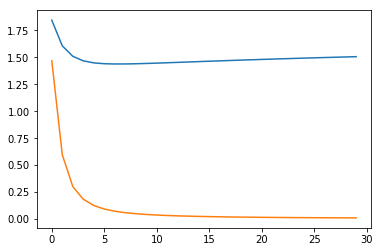

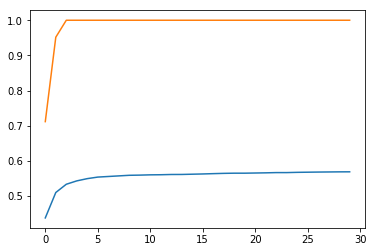

In [16]:
print(history1.history.keys())
plt.plot(np.arange(30), history1.history['val_loss'])
plt.plot(np.arange(30), history1.history['loss'])
plt.show()
plt.plot(np.arange(30), history1.history['val_acc'])
plt.plot(np.arange(30), history1.history['acc'])
plt.show()

In [17]:
model2 = Sequential()
model2.add(Dense(30, activation='sigmoid'))
model2.add(Dense(20, activation='sigmoid'))
model2.add(Dense(10, activation='softmax'))

loss = keras.losses.categorical_crossentropy
model2.compile(loss=loss,
              optimizer='sgd',
              metrics=['accuracy'])

history2 = model2.fit(x_train, y_train, validation_data = (x_val, y_val), batch_size=32, epochs=50)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 136us/step - loss: 2.2608 - acc: 0.2387 - val_loss: 2.1953 - val_acc: 0.4226
Epoch 2/50
50000/50000 [==============================] - 6s 128us/step - loss: 2.0916 - acc: 0.4772 - val_loss: 1.9520 - val_acc: 0.5417
Epoch 3/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.7821 - acc: 0.5577 - val_loss: 1.5868 - val_acc: 0.6331
Epoch 4/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.4321 - acc: 0.6373 - val_loss: 1.2565 - val_acc: 0.7023
Epoch 5/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.1606 - acc: 0.7016 - val_loss: 1.0233 - val_acc: 0.7531
Epoch 6/50
50000/50000 [==============================] - 7s 130us/step - loss: 0.9713 - acc: 0.7523 - val_loss: 0.8617 - val_acc: 0.7880
Epoch 7/50
50000/50000 [==============================] - 7s 132us/step - loss: 0.8373 - acc: 0.7882 - val_loss: 0.7462 - 

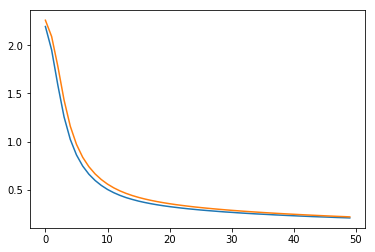

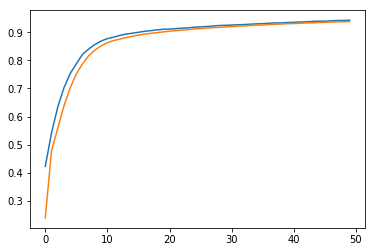

In [18]:
plt.plot(np.arange(50), history2.history['val_loss'])
plt.plot(np.arange(50), history2.history['loss'])
plt.show()
plt.plot(np.arange(50), history2.history['val_acc'])
plt.plot(np.arange(50), history2.history['acc'])
plt.show()

Na testovanie potom použijeme metódu eval

In [19]:
loss, accuracy = model2.evaluate(x_test,y_test)
print("Loss: {}".format(loss))
print("Accuracy: {}".format(accuracy))

10000/10000 [==============================] - 1s 52us/step
Loss: 0.21701645460128785
Accuracy: 0.9394


## Nastavenie trénovacieho kroku

Už sme si ukázali ako zobraziť vývoj trénovania. Teraz si pozrieme ako nastaviť krok aby sa nám podarilo nájsť ideálny startovací bod.

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 7s 146us/step - loss: 0.7223 - acc: 0.7903 - val_loss: 0.2984 - val_acc: 0.9143
Epoch 2/5
50000/50000 [==============================] - 7s 134us/step - loss: 0.2714 - acc: 0.9221 - val_loss: 0.2246 - val_acc: 0.9368
Epoch 3/5
50000/50000 [==============================] - 7s 139us/step - loss: 0.2017 - acc: 0.9407 - val_loss: 0.1937 - val_acc: 0.9430
Epoch 4/5
50000/50000 [==============================] - 7s 139us/step - loss: 0.1669 - acc: 0.9504 - val_loss: 0.1535 - val_acc: 0.9570
Epoch 5/5
50000/50000 [==============================] - 7s 131us/step - loss: 0.1437 - acc: 0.9569 - val_loss: 0.1570 - val_acc: 0.9556
Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 7s 141us/step - loss: 1.2208 - acc: 0.6707 - val_loss: 0.5138 - val_acc: 0.8695
Epoch 2/5
50000/50000 [==============================] - 6s 126us/step - loss:

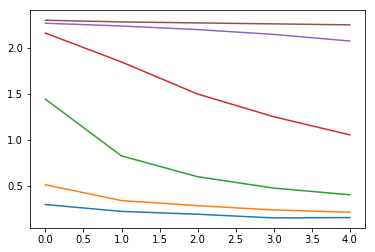

In [20]:
lr_list = [0.3, 0.1, 0.03, 0.01, 0.003, 0.001]


for lr in lr_list:
  model = Sequential()
  model.add(Dense(30, activation='sigmoid'))
  model.add(Dense(20, activation='sigmoid'))
  model.add(Dense(10, activation='softmax'))
  sgd = keras.optimizers.SGD(lr)
  loss = keras.losses.categorical_crossentropy
  model.compile(loss=loss,
                optimizer=sgd,
                metrics=['accuracy'])
  h = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=32, epochs=5)
  plt.plot(np.arange(5), h.history['val_loss'])
  
plt.show()

Je vidno, že na začiatku trénovania je vhodné využiť väčší krok. Problém však môže nastať neskôr keď bude krok príliš veľký.

## Uloženie a nahratie modelu

Teraz si ukážeme ako uložiť a nahrať model

In [21]:
model = Sequential()
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
sgd = keras.optimizers.SGD(0.3)
loss = keras.losses.categorical_crossentropy
model.compile(loss=loss,
              optimizer=sgd,
              metrics=['accuracy'])
h = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=32, epochs=5)
model.save("model_5_epoch.h5")

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 7s 149us/step - loss: 0.6828 - acc: 0.7977 - val_loss: 0.2989 - val_acc: 0.9156
Epoch 2/5
50000/50000 [==============================] - 7s 135us/step - loss: 0.2596 - acc: 0.9240 - val_loss: 0.2056 - val_acc: 0.9429
Epoch 3/5
50000/50000 [==============================] - 7s 139us/step - loss: 0.1967 - acc: 0.9426 - val_loss: 0.1715 - val_acc: 0.9536
Epoch 4/5
50000/50000 [==============================] - 7s 136us/step - loss: 0.1600 - acc: 0.9533 - val_loss: 0.1548 - val_acc: 0.9575
Epoch 5/5
50000/50000 [==============================] - 7s 136us/step - loss: 0.1378 - acc: 0.9594 - val_loss: 0.1527 - val_acc: 0.9573


In [22]:
from keras.models import load_model

model_loaded = load_model("model_5_epoch.h5")

h_l = model_loaded.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=32, epochs=10, initial_epoch=5)

sgd = keras.optimizers.SGD(0.1)
loss = keras.losses.categorical_crossentropy
model_loaded.compile(loss=loss,
                     optimizer=sgd,
                     metrics=['accuracy'])
h_l = model_loaded.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=32, epochs=15, initial_epoch=10)

Train on 50000 samples, validate on 10000 samples
Epoch 6/10
50000/50000 [==============================] - 7s 138us/step - loss: 0.1220 - acc: 0.9642 - val_loss: 0.1381 - val_acc: 0.9611
Epoch 7/10
50000/50000 [==============================] - 7s 133us/step - loss: 0.1104 - acc: 0.9675 - val_loss: 0.1443 - val_acc: 0.9586
Epoch 8/10
50000/50000 [==============================] - 7s 134us/step - loss: 0.1015 - acc: 0.9697 - val_loss: 0.1285 - val_acc: 0.9646
Epoch 9/10
50000/50000 [==============================] - 6s 130us/step - loss: 0.0943 - acc: 0.9726 - val_loss: 0.1333 - val_acc: 0.9634
Epoch 10/10
50000/50000 [==============================] - 7s 133us/step - loss: 0.0866 - acc: 0.9746 - val_loss: 0.1332 - val_acc: 0.9614
Train on 50000 samples, validate on 10000 samples
Epoch 11/15
50000/50000 [==============================] - 8s 150us/step - loss: 0.0708 - acc: 0.9801 - val_loss: 0.1219 - val_acc: 0.9654
Epoch 12/15
50000/50000 [==============================] - 7s 134us/st

## Callbacky

V predchádzajúcom príklade sme robili nejaké veci vždy po nejakej epoche (zmenšovanie kroku, ukladanie). Na to môžeme použiť aj tzv. callbacky. Tie použijeme pri volaní metódy fit. To si teraz otestujeme.

In [0]:
model = Sequential()
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
sgd = keras.optimizers.SGD(0.3)
loss = keras.losses.categorical_crossentropy
model.compile(loss=loss,
              optimizer=sgd,
              metrics=['accuracy'])


In [0]:
from keras.callbacks import *
callbacks = []

Pomerne užitočný callback je ModelCheckpoint. V jeho konštruktore je možné definovať formu názvu uloženého súboru. Takisto je možné udržať si uložený len checkpoint napr. s najlepšou validačnou presnosťou.

In [0]:
callbacks.append(ModelCheckpoint('mnist_{epoch:02d}-{val_loss:.8f}-{val_acc:.4f}.h5', verbose=1, period=1))

Tensorboard callback nám umožňuje sledovať vývoj tréningu pomocou utility TensorBoard

In [0]:
callbacks.append(TensorBoard(log_dir='./logs'))

Early Stopping nám umožní skončiť trénovanie ak sa dostaneme do situácie ak sa nejaká metrika (validačná presnosť, alebo loss) nezlepšuje počas nejakého množstva epôch.

In [0]:
callbacks.append(EarlyStopping(monitor='val_loss', patience=5, verbose=1))

Podobne použijeme callback, ktorý v prípade, že sa dostaneme do situácie ak sa nejaká metrika nezlepšuje, tak zníži krok optimalizačného algoritmu.

In [0]:
callbacks.append(ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001, verbose=1))

Nakoniec môžeme trénovať.

In [29]:
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=30, callbacks=callbacks, batch_size=32)

Train on 50000 samples, validate on 10000 samples

Epoch 1/30
50000/50000 [==============================] - 7s 145us/step - loss: 0.7009 - acc: 0.7957 - val_loss: 0.2791 - val_acc: 0.9232

Epoch 00001: saving model to mnist_01-0.27911393-0.9232.h5
Epoch 2/30
50000/50000 [==============================] - 7s 137us/step - loss: 0.2563 - acc: 0.9263 - val_loss: 0.2287 - val_acc: 0.9314

Epoch 00002: saving model to mnist_02-0.22871561-0.9314.h5
Epoch 3/30
50000/50000 [==============================] - 7s 136us/step - loss: 0.1939 - acc: 0.9436 - val_loss: 0.1589 - val_acc: 0.9531

Epoch 00003: saving model to mnist_03-0.15892626-0.9531.h5
Epoch 4/30
50000/50000 [==============================] - 7s 136us/step - loss: 0.1611 - acc: 0.9525 - val_loss: 0.1442 - val_acc: 0.9581

Epoch 00004: saving model to mnist_04-0.14421442-0.9581.h5
Epoch 5/30
50000/50000 [==============================] - 7s 133us/step - loss: 0.1387 - acc: 0.9582 - val_loss: 0.1321 - val_acc: 0.9599

Epoch 00005: savin

Výsledkom tohto postupu je postupné znižovanie kroku a ukladanie modelov popri trénovaní. Modely môžeme načítať ako sme si už ukázali. Takisto sa nám uložila zložka logs s dátami pre TensorBoard.

In [30]:
%load_ext tensorboard
%tensorboard --logdir logs

In [31]:
!kill 1672

/bin/bash: line 0: kill: (1672) - No such process


### Úloha 1

Existuje aj callback LearningRateScheduler. Nájdite si ho v dokumentácií kerasu a spustite si tréning s týmto callbackom, tak aby sa zmenšovanie kroku dialo podobne ako keď sme použili ReduceLROnPlateau.

## Regularizácia

Pri splite sme si ukazovali ako nastáva tzv. overfitting kedy sa model sa zlepšuje na trénovacej množine, ale voči validačnej stagnuje, alebo sa dokonca zhoršuje. Prístupy riešenia tohto problému je viacero. Teraz si ukážeme jeden prístup. Ten je založený na pozmenení výrazu cenovej funkcie. Tá bude mať tvar:

$$ C_r = C + \lambda R,$$

kde $C$ je naša pôvodná cenová funkcia a $R$ je regularizačná cenová funkcia. Rozdiel medzi nimi je hlavne v tom, že $R$ je funkciou parametrov siete a vôbec nezávisí na trénovacích dátach. $\lambda$ je hyperparameter ktorý určuje "silu" regularizácie. Najpoužívanejšie regularizačné cenové funkcie sú tzv. L1 a L2 regularizácia.

$$ R_{L1} = \sum_{w \in W} |w|$$
$$ R_{L2} = \sum_{w \in W} w^2$$

kde $W$ je množina parametrov na ktoré aplikujeme regularizáciu. Ako je značením naznačené, tak túto regularizáciu budeme aplikovať iba na váhové vektory. Regularizáciu si teraz otestujeme na umelom príklade, kde sa pokúsime natrénovať model iba na 50 príkladoch z trénovacej množiny. Najprv bez regularizácie.

In [32]:
x_mini = x[:20]
y_mini = y[:20]

model = Sequential()
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

loss = keras.losses.categorical_crossentropy
sgd = keras.optimizers.SGD(0.3)
model.compile(loss=loss,
              optimizer=sgd,
              metrics=['accuracy'])

h_r = model.fit(x_mini, y_mini, steps_per_epoch=1000, epochs=10)
[loss, acc] = model.evaluate(x_val, y_val)
print("Eval loss: {}, Eval acc: {}".format(loss, acc))

Epoch 1/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.3342 - acc: 0.9220
Epoch 2/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0105 - acc: 1.0000
Epoch 3/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0052 - acc: 1.0000
Epoch 4/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0034 - acc: 1.0000
Epoch 5/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0025 - acc: 1.0000
Epoch 6/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0020 - acc: 1.0000
Epoch 7/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0017 - acc: 1.0000
Epoch 8/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0014 - acc: 1.0000
Epoch 9/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0012 - acc: 1.0000
Epoch 10/10
10000/10000 [==============================] - 1s 82us/step
Eval loss: 2.0962120551109313, Eval acc: 0.5512


In [33]:
from keras.regularizers import l1, l2

x_mini = x[:20]
y_mini = y[:20]

lmbda = 0.0001
model = Sequential()
model.add(Dense(30, activation='sigmoid', kernel_regularizer=l2(lmbda)))
model.add(Dense(20, activation='sigmoid', kernel_regularizer=l2(lmbda)))
model.add(Dense(10, activation='softmax', kernel_regularizer=l2(lmbda)))

loss = keras.losses.categorical_crossentropy
sgd = keras.optimizers.SGD(0.3)
model.compile(loss=loss,
              optimizer=sgd,
              metrics=['accuracy'])

h_r = model.fit(x_mini, y_mini, steps_per_epoch=1000, epochs=10)
[loss, acc] = model.evaluate(x_val, y_val)
print("Eval loss: {}, Eval acc: {}".format(loss, acc))

Epoch 1/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.3600 - acc: 0.9313
Epoch 2/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0590 - acc: 1.0000
Epoch 3/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0551 - acc: 1.0000
Epoch 4/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0534 - acc: 1.0000
Epoch 5/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0522 - acc: 1.0000
Epoch 6/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0513 - acc: 1.0000
Epoch 7/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0504 - acc: 1.0000
Epoch 8/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0497 - acc: 1.0000
Epoch 9/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0491 - acc: 1.0000
Epoch 10/10
10000/10000 [==============================] - 1s 94us/step
Eval loss: 1.7875657912254332, Eval acc: 0.5453


### Úloha 2

Nájdite pre tento prípad najlepší parameter $\lambda$ a krok optimalizačného algoritmu a porovnajte l1 a l2 regularizáciu.